# Prediciting College Admission

In this project, I will prepare to create a model that will help predict the chance of admit for future student profiles by exploring the data, creating features, and choosing the best features. 

The outcome variable is the Chance of Admit variable. 

The variables are as follows:

1. GRE Score (out of 340)
2. TOEFL Score (out of 120)
3. Univeristy Rating (out of 5)
4. SOP- Statement of Purpose Strength (out of 5)
6. LOR- Letter of Recommendation Strength (out of 5)
7. CGPA- College Undergraduate GPA (out of 10)
8. Research (categorical, either 0 for no research experience or 1 for research experience)
9. Chance of Admit (scale of 0 to 1)

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
df = pd.read_csv('Admission_Predict.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [60]:
# Drop the Serial No. column as it is not needed for the analysis
df = df.drop(columns='Serial No.')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Describe the data

In [71]:
#Basic univariate statistics
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Bivariate Exploration of continuous variables

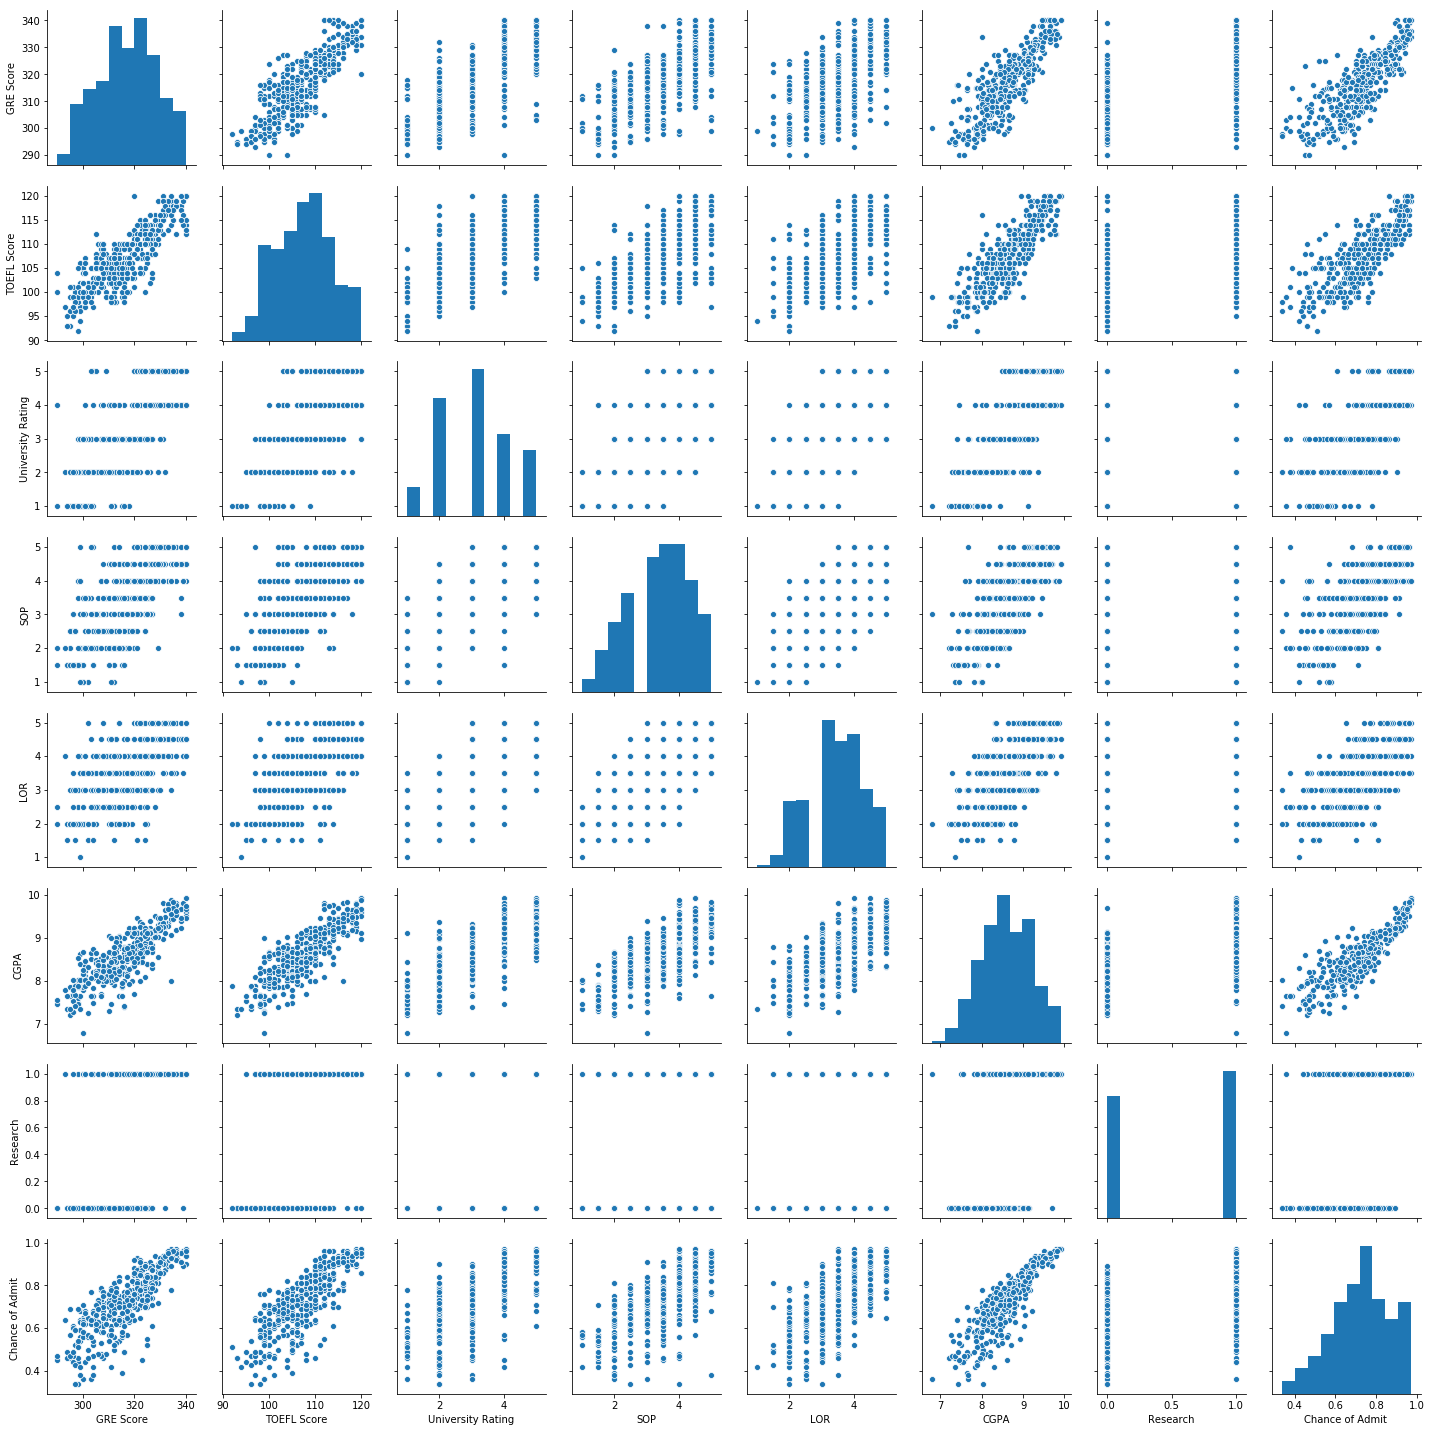

In [62]:
g = sns.pairplot(df)
plt.show()

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

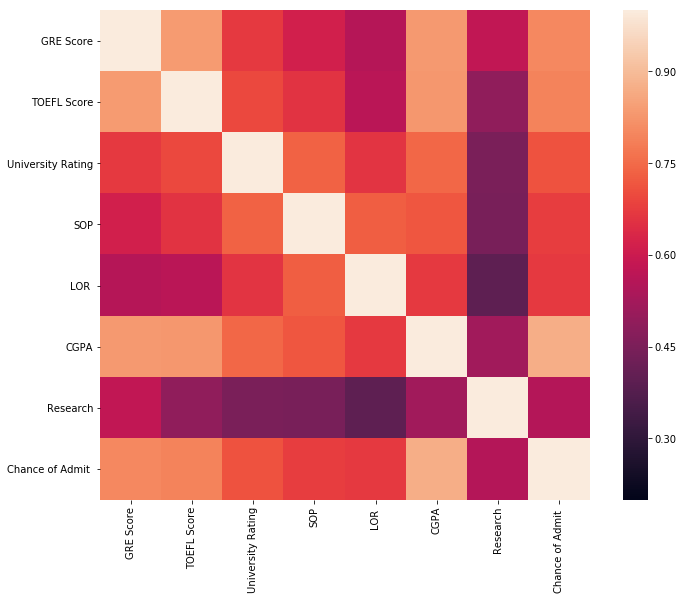

In [139]:
corrmat = df.corr()
print(corrmat)

ax = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, vmin=.2, square=True)
plt.show()

Thus far, it seems that GRE score, TOEFL score, and College GPA are correlated to teach other more than any other grouping of variables.

### Bivariate Explorations of One Continuous and One Categorical Variables

I will create boxplots of the categorical variable, Research, with each continuous variable one plot at a time due to the wide variance of values for each variable.

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


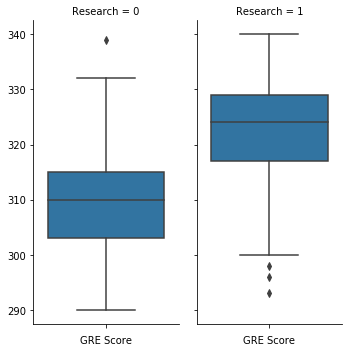

In [64]:

g = sns.FacetGrid(df, col='Research', height=5, aspect=.5)
g = g.map(sns.boxplot, 'GRE Score', orient='v')
plt.show()

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


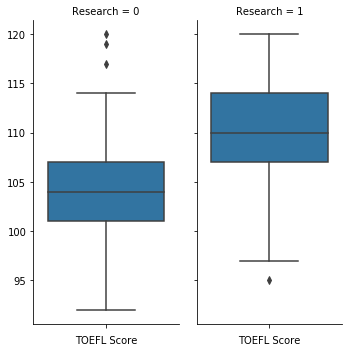

In [65]:
g = sns.FacetGrid(df, col='Research', height=5, aspect=.5)
g = g.map(sns.boxplot, 'TOEFL Score', orient='v')
plt.show()

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


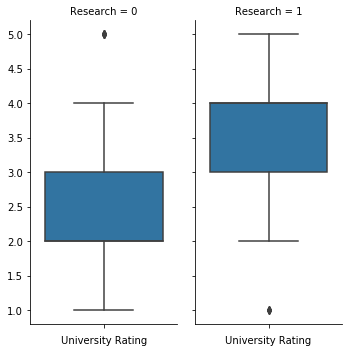

In [66]:
g = sns.FacetGrid(df, col='Research', height=5, aspect=.5)
g = g.map(sns.boxplot, 'University Rating', orient='v')
plt.show()

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


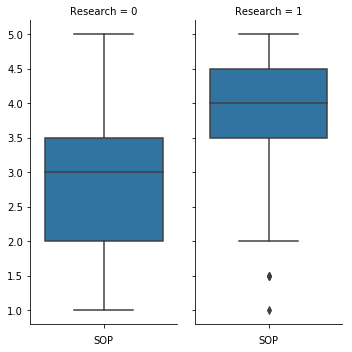

In [67]:
g = sns.FacetGrid(df, col='Research', height=5, aspect=.5)
g = g.map(sns.boxplot, 'SOP', orient='v')
plt.show()

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


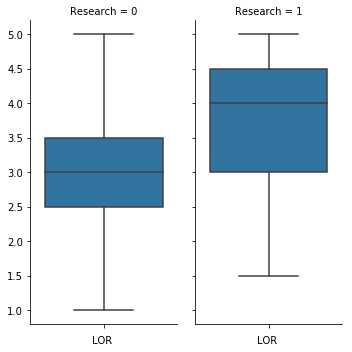

In [69]:
g = sns.FacetGrid(df, col='Research', height=5, aspect=.5)
g = g.map(sns.boxplot, 'LOR ', orient='v')
plt.show()

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


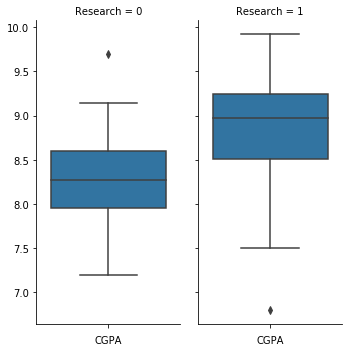

In [70]:
g = sns.FacetGrid(df, col='Research', height=5, aspect=.5)
g = g.map(sns.boxplot, 'CGPA', orient='v')
plt.show()

Each variable has one or two outliers, but none have an amount that makes me concerned.

In [76]:
#Descriptive Statistics by Research Experience
print(df.groupby('Research').describe())

           CGPA                                                   \
          count      mean       std  min   25%   50%   75%   max   
Research                                                           
0         181.0  8.257182  0.466065  7.2  7.95  8.27  8.60  9.70   
1         219.0  8.881370  0.542563  6.8  8.51  8.97  9.24  9.92   

         Chance of Admit            ...  TOEFL Score        University Rating  \
                    count      mean ...          75%    max             count   
Research                            ...                                         
0                   181.0  0.637680 ...        107.0  120.0             181.0   
1                   219.0  0.795982 ...        114.0  120.0             219.0   

                                                       
              mean       std  min  25%  50%  75%  max  
Research                                               
0         2.524862  0.957828  1.0  2.0  2.0  3.0  5.0  
1         3.552511  1.075469 

In [77]:
# Test whether group differences are significant.
for col in df.loc[:,'GRE Score':'CGPA'].columns:
    print(col)
    print(stats.ttest_ind(
        df[df['Research'] == 0][col],
        df[df['Research'] == 1][col]
    ))

GRE Score
Ttest_indResult(statistic=-14.218609390981028, pvalue=2.168740602699294e-37)
TOEFL Score
Ttest_indResult(statistic=-11.209689627465801, pvalue=1.5655039444113337e-25)
University Rating
Ttest_indResult(statistic=-9.990838177828016, pvalue=4.039379755166263e-21)
SOP
Ttest_indResult(statistic=-9.886409883024394, pvalue=9.35408085654271e-21)
LOR 
Ttest_indResult(statistic=-8.62566130856307, pvalue=1.5351621450034107e-16)
CGPA
Ttest_indResult(statistic=-12.198187851334561, pvalue=2.69780274611843e-29)


There is statistically significant difference in the continuous variables when compared by research experience.

## Feature Creation

In [91]:
# Create features dataframe, beginning with the research experience feature
features = pd.DataFrame(df['Research'])

Research experience seems to me like a good place to start with my features. There is evidence in the correlation matrix that it is correlated to the chance of admission and it is an easy one to understand. I will also run a graph to confirm the relationship.

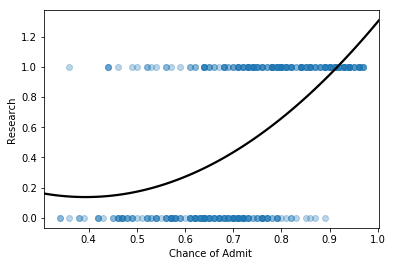

In [89]:
sns.regplot(
    df['Chance of Admit '],
    y=df['Research'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

This plot confirms that there is a positive linear relationship between between having research experience and having a higher chance of admission. I will now check with the other six variables for positive linear relationhip before checking on other issues and turning them into features.

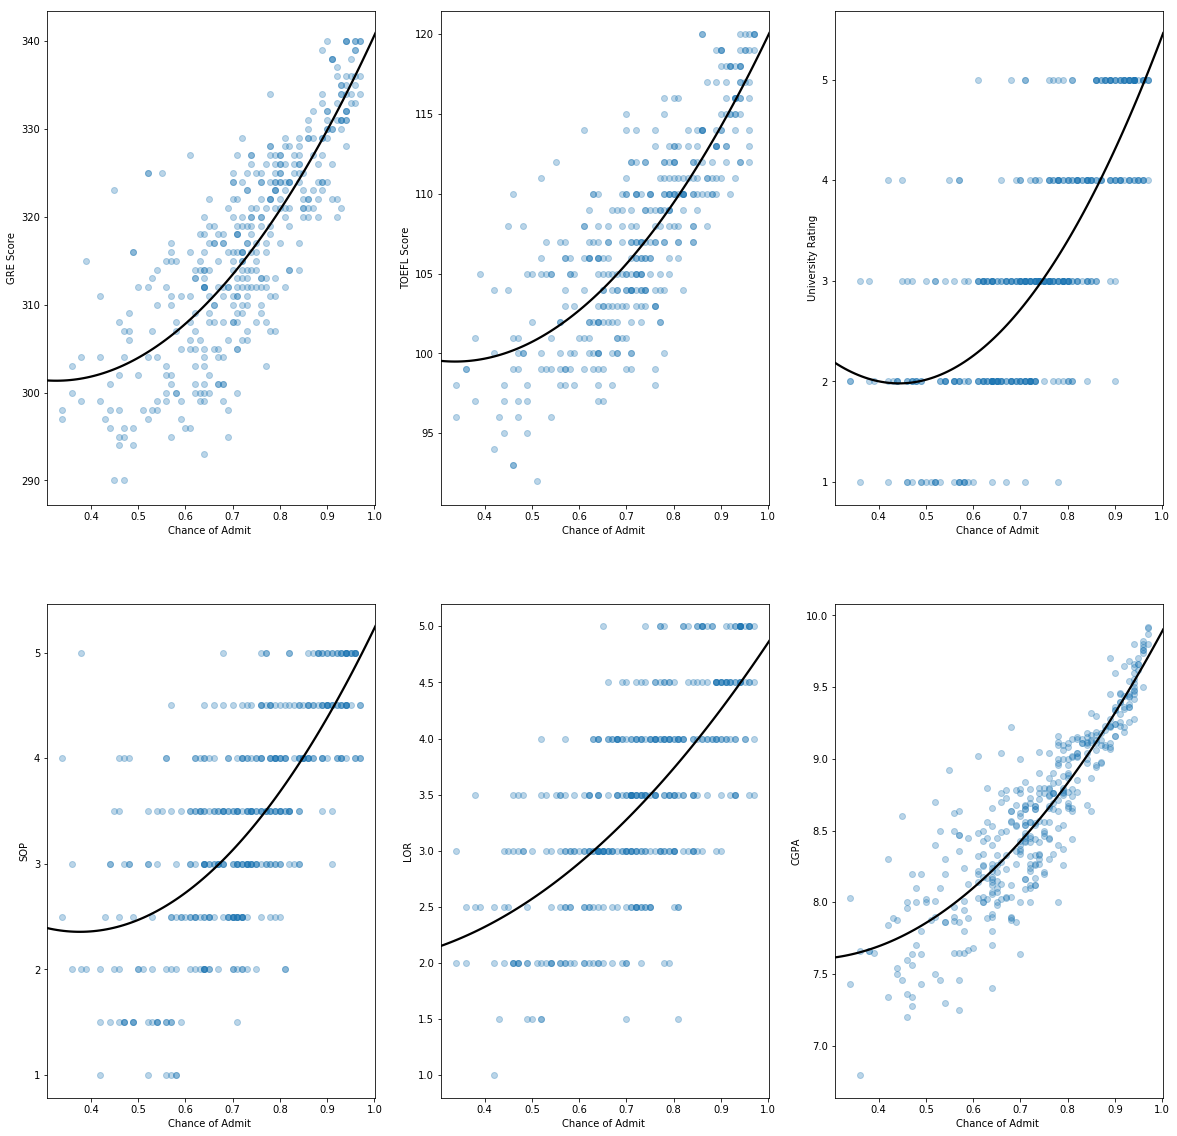

In [110]:
#Check for normality issues in GRE Scores
fig = plt.figure(figsize=(20,20))

fig.add_subplot(231)
sns.regplot(
    df['Chance of Admit '],
    y=df['GRE Score'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

fig.add_subplot(232)
sns.regplot(
    df['Chance of Admit '],
    y=df['TOEFL Score'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

fig.add_subplot(233)
sns.regplot(
    df['Chance of Admit '],
    y=df['University Rating'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

fig.add_subplot(234)
sns.regplot(
    df['Chance of Admit '],
    y=df['SOP'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

fig.add_subplot(235)
sns.regplot(
    df['Chance of Admit '],
    y=df['LOR '],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

fig.add_subplot(236)
sns.regplot(
    df['Chance of Admit '],
    y=df['CGPA'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

plt.show()

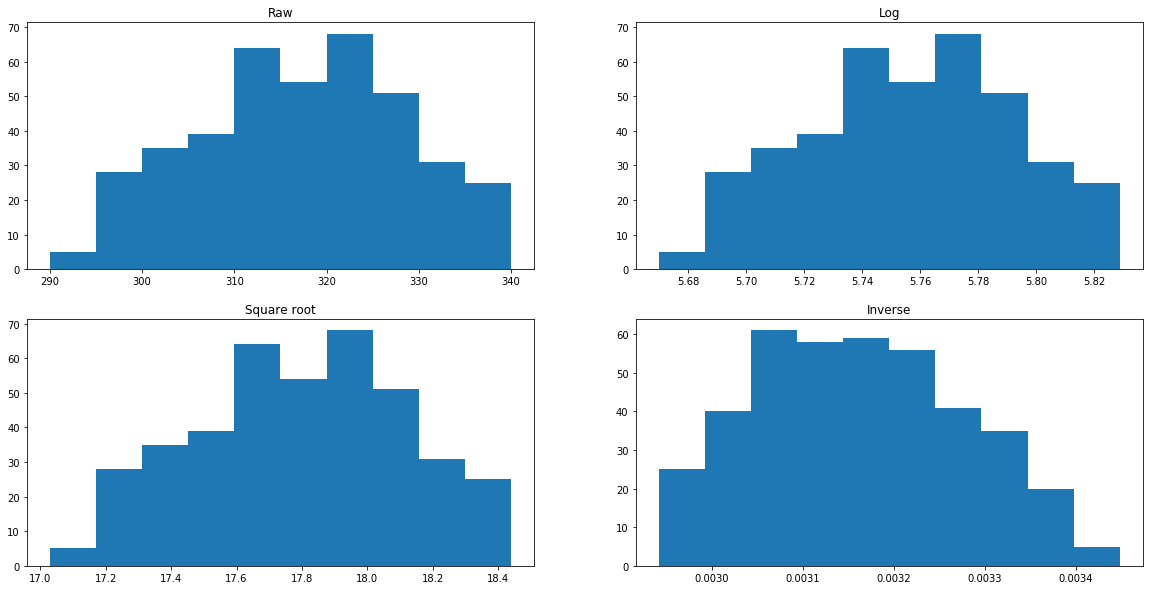

In [95]:
#Check for normality issues in GRE Scores
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
plt.hist(df['GRE Score'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['GRE Score']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['GRE Score']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['GRE Score'])
plt.title('Inverse')
plt.show()

Based on the above graphs, I will take the inverse of GRE scores as my feature, judging that graph to be closest to normally distributed.

In [97]:
features['GRE_scores_inverse'] = 1/df['GRE Score']

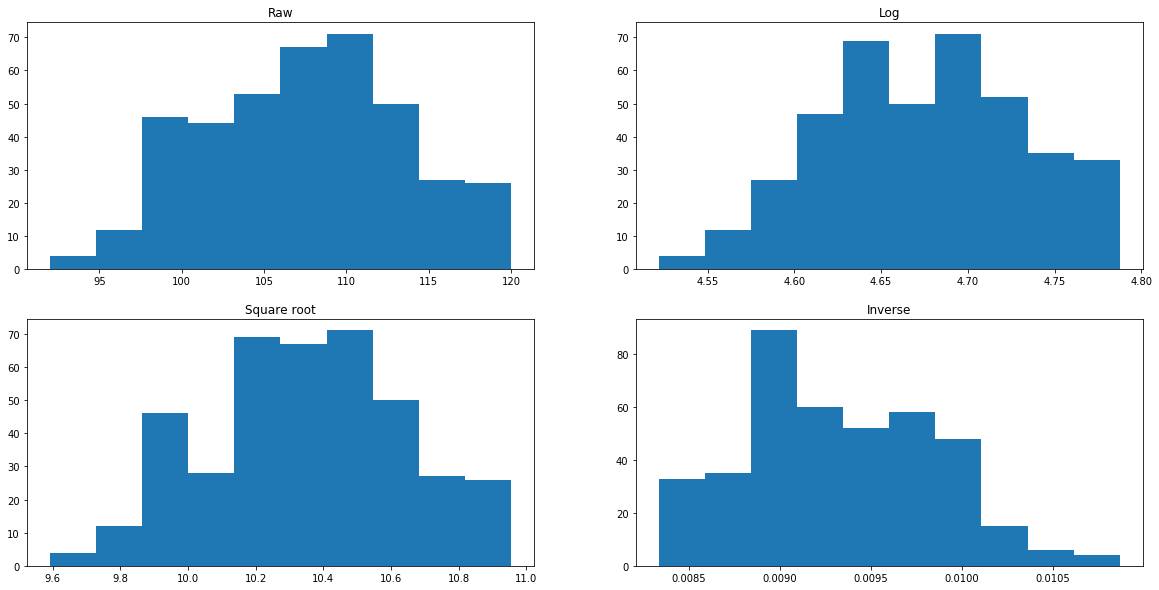

In [100]:
#Check for normality issues in TOEFL Scores
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
plt.hist(df['TOEFL Score'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['TOEFL Score']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['TOEFL Score']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['TOEFL Score'])
plt.title('Inverse')
plt.show()

The raw TOEFL scores seem to be closest to normality, so they will be accepted as is as a feature.

In [101]:
features['TOEFL_scores_raw'] = df['TOEFL Score']

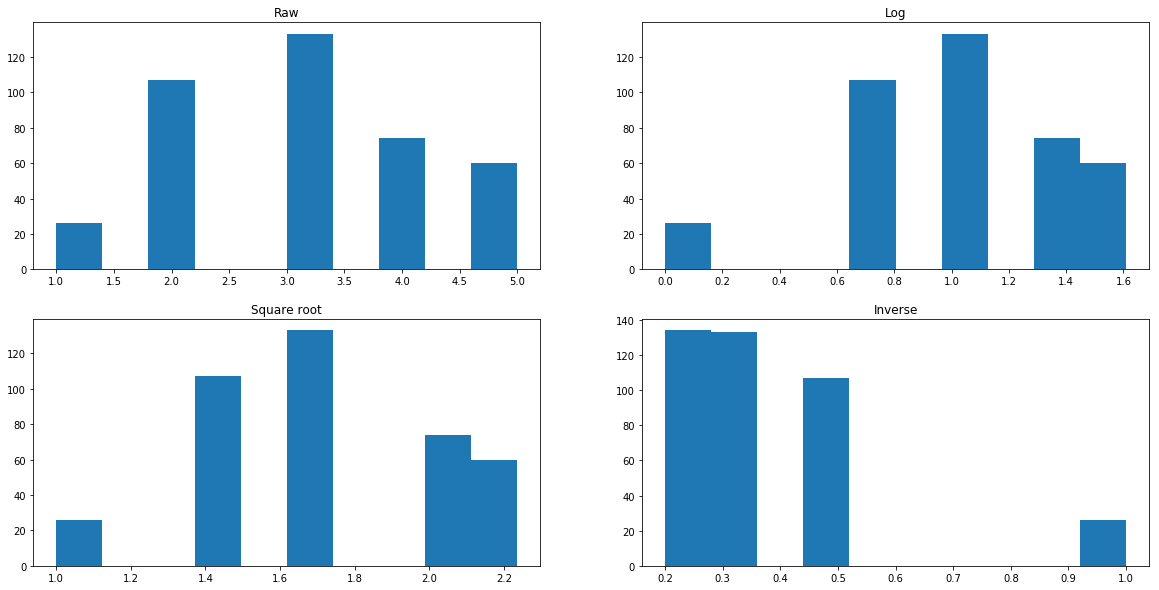

In [103]:
#Check for normality issues in University Rating
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
plt.hist(df['University Rating'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['University Rating']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['University Rating']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['University Rating'])
plt.title('Inverse')
plt.show()

The raw again seems to have the most normality, so it will be taken as a feature

In [104]:
features['University_Rating_raw'] = df['University Rating']

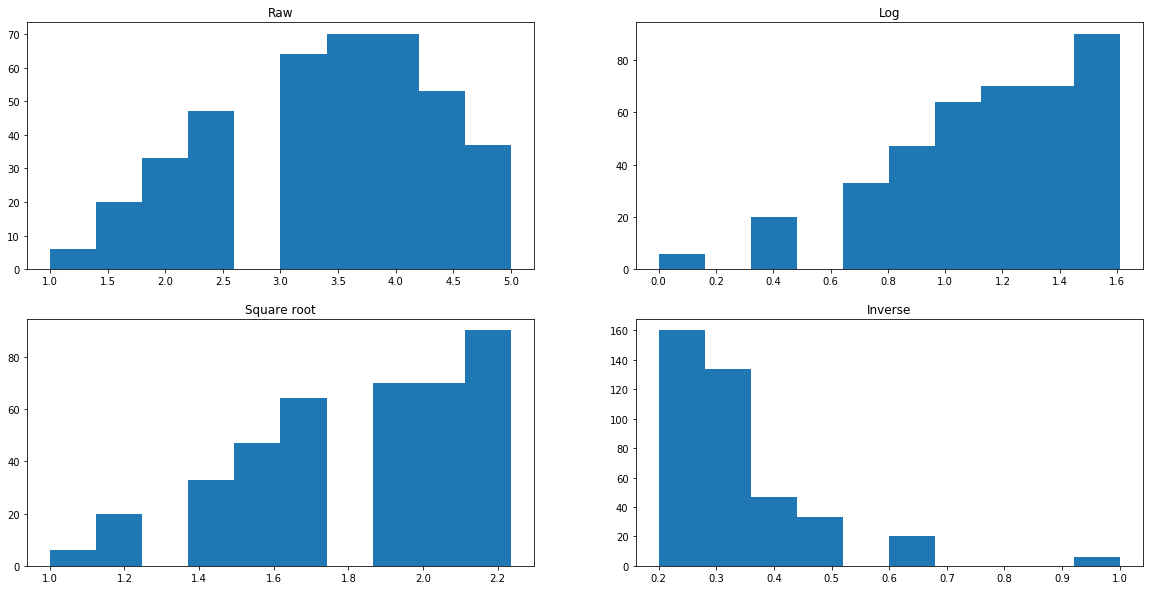

In [111]:
#Check for normality issues in SOP
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
plt.hist(df['SOP'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['SOP']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['SOP']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['SOP'])
plt.title('Inverse')
plt.show()

Raw scores are again closest to normality, so SOP will be accepted raw.

In [112]:
features['SOP_raw'] = df['SOP']

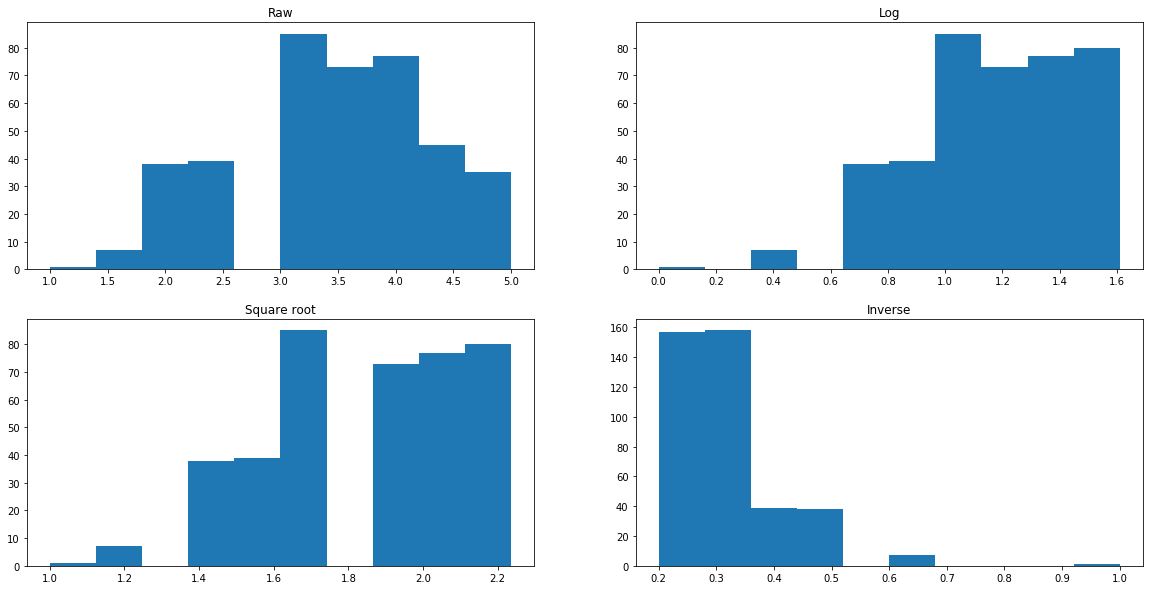

In [113]:
#Check for normality issues in LOR
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
plt.hist(df['LOR '])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['LOR ']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['LOR ']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['LOR '])
plt.title('Inverse')
plt.show()

The raw scores for LOR will be accepted.

In [114]:
features['LOR_raw'] = df['LOR ']

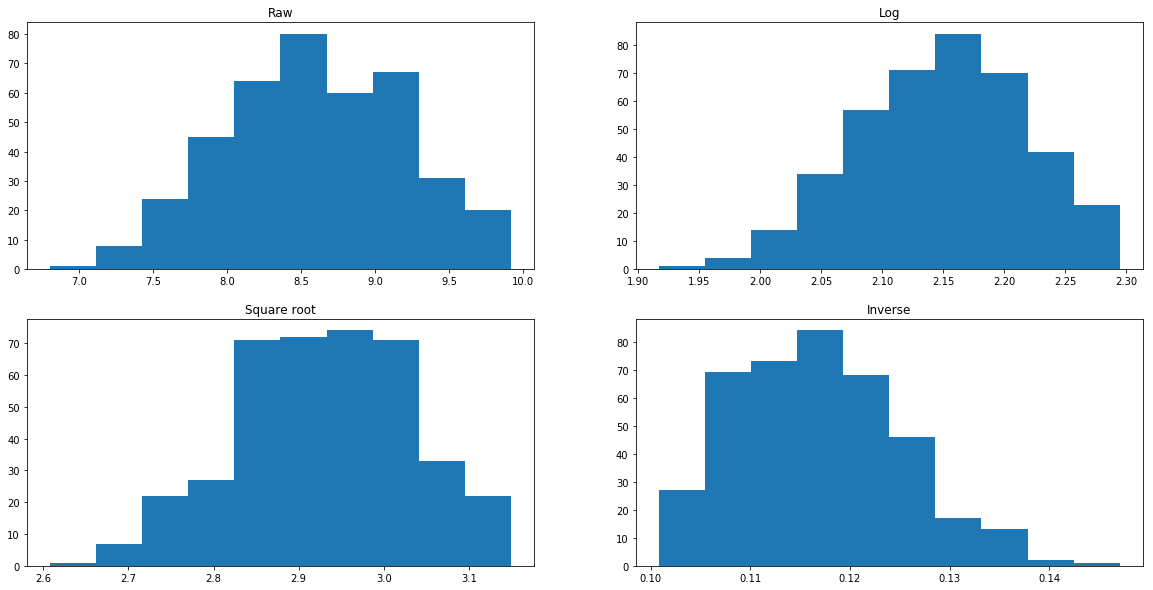

In [116]:
#Check for normality issues in CGPA
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
plt.hist(df['CGPA'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['CGPA']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['CGPA']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df['CGPA'])
plt.title('Inverse')
plt.show()

The raw scores again look most normal

In [118]:
features['CGPA_raw'] = df['CGPA']

I am curious now to see if there is an interaction between college GPA and University Rating in terms of the chance of admission. I would guess that the applicants who went to higher rated universities would have higher chances of getting accepted as their college GPA increases than the applicants from lower rated universities.

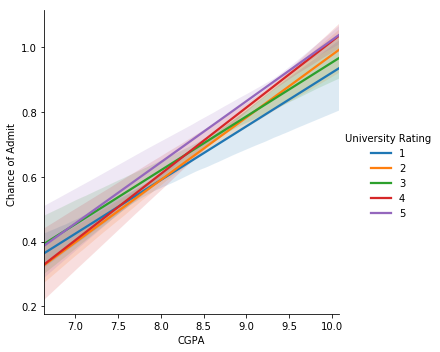

In [120]:
sns.lmplot(
    x='CGPA',
    y='Chance of Admit ',
    hue='University Rating',
    data=df,
    scatter=False
)
plt.show()

I was correct. As college GPA increases, the chance of admission increases more dramatically for applicants with a higher university rating. I will create a feature that mulitplies the university rating and the college GPA.

In [121]:
features['CGPA_by_University_rating'] = df['CGPA'] * df['University Rating']

I am curious if there is a similar effect for applicants from higher rated universities with the letters of reccomendation. I would guess that letters of recommendation from higher rated universities have more clout, so there will be a similar effect as with college GPA.

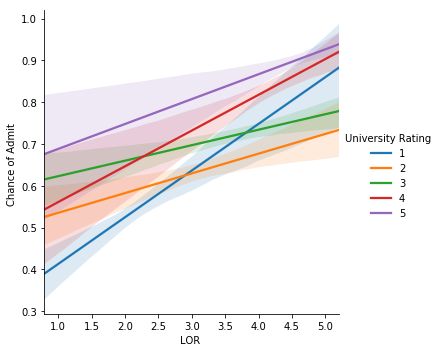

In [122]:
sns.lmplot(
    x='LOR ',
    y='Chance of Admit ',
    hue='University Rating',
    data=df,
    scatter=False
)
plt.show()

Overall, there is a similar effect. Higher rated universities tend to have better results as the strength of letter of recommendation increases. I will create another feature that captures this interaction.

In [123]:
features['LOR_by_University_rating'] = df['LOR '] * df['University Rating']

For my last feature, I will run a PCA of GRE scores and TOEFL scores, since I noticed they were highly correlated in my earlier analysis. When whittling down my features from 10 to 5, I could keep the PCA component feature and discard the GRE and TOEFL scores features.

In [131]:
#Select the variables I want for PCA
x = df.loc[:, ['GRE Score', 'TOEFL Score']]
#Standardize the values
x = StandardScaler().fit_transform(x)
#Run PCA
pca = PCA(n_components=1)
pca_feature = pca.fit_transform(x)
#Insert new PCA feature into features
features['pca_feature'] = pca_feature

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Lastly, I will standardize all features

In [134]:
# Save the column names.
names=features.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
features_scaled = pd.DataFrame(preprocessing.scale(features), columns=names)

c:\users\ross last\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


Now I will introduce the outcome variable, chance of admit, into the features dataframe. I will then run a correlation to whittle down to my final 5 features.

In [138]:
features_with_outcome = pd.concat([features_scaled, df[['Chance of Admit ']]], axis = 1)

In [140]:
corrmat_features = features_with_outcome.corr()
print(corrmat_features)

                           Research  GRE_scores_inverse  TOEFL_scores_raw  \
Research                   1.000000           -0.578020          0.489858   
GRE_scores_inverse        -0.578020            1.000000         -0.831828   
TOEFL_scores_raw           0.489858           -0.831828          1.000000   
University_Rating_raw      0.447783           -0.663721          0.695590   
SOP_raw                    0.444029           -0.610643          0.657981   
LOR_raw                    0.396859           -0.555724          0.567721   
CGPA_raw                   0.521654           -0.829274          0.828417   
CGPA_by_University_rating  0.476876           -0.712787          0.739303   
LOR_by_University_rating   0.463816           -0.668798          0.691265   
pca_feature               -0.558517            0.955511         -0.958117   
Chance of Admit            0.553202           -0.800073          0.791594   

                           University_Rating_raw   SOP_raw   LOR_raw  \
Res

In [143]:
#Filter selecting the five features
features_final = features_with_outcome.loc[:, ['pca_feature', 'CGPA_raw', 'LOR_by_University_rating',
                                               'SOP_raw', 'Research', 'Chance of Admit ']]

In [145]:
features_final.head()

,pca_feature,CGPA_raw,LOR_by_University_rating,SOP_raw,Research,Chance of Admit
0,-1.831236,1.764818,1.065807,1.093864,0.909112,0.92
1,-0.292251,0.455151,1.065807,0.596653,0.909112,0.76
2,0.330333,-1.005631,-0.133751,-0.397769,0.909112,0.72
3,-0.459434,0.119339,-0.613574,0.099442,0.909112,0.80
4,0.507500,-0.653029,-0.853485,-1.392191,-1.099975,0.65


My finished features has the pca feature that accounted for the GRE Scores and TOEFL scores. I left those out to avoid overfitting. The CGPA_raw had higher correlation to admission than did the CGPA by University, so I took the raw CGAP instead. The Letters of Recommendation(LOR) however had a higher rating by University rating than in raw form, so I took the LOR_by Univerit_rating. Statement of Purpose(SOP) had a high correlation to the chance of admission, so I took that as my fourth feature. That left me with two feature options for my last choice: University rating and Research experience. Since University rating is baked into the LOR_by_University_rating feature, I chose the Research feature instead as my final feature.